Intersection coordinates (x, y): [0.56122742] [769.56042588]


Text(-30, 20, ' (0.56, 769.56)')

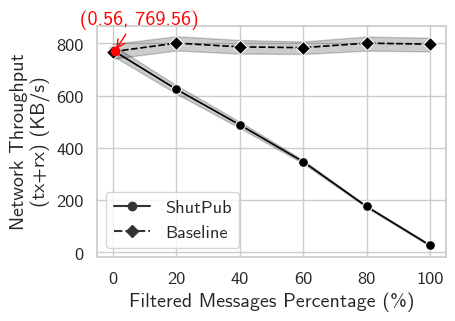

In [2]:
from scipy.optimize import fsolve
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.signal import find_peaks
import seaborn as sns


sns.set(font_scale=1.2, style='whitegrid', font='CMU Sans Serif', rc={'figure.figsize':(4.5,3)})

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['figure.dpi'] = 100
rcParams['axes.unicode_minus'] = False

file_set = {
    100:[
        'log/0902/publisher/bs/BCDEF_pub_baseline.csv',
        'log/0902/publisher/psf/BCDEF_pub_psf.csv',
    ],
    80:[
        'log/0902/publisher/bs/ABCDE_pub_baseline.csv',
        'log/0902/publisher/psf/ABCDE_pub_psf.csv',
    ],
    60 :[
        'log/0902/publisher/bs/AACDE_pub_baseline.csv',
        'log/0902/publisher/psf/AACDE_pub_psf.csv',
    ],
    40:[
        'log/0902/publisher/bs/AAADE_pub_baseline.csv',
        'log/0902/publisher/psf/AAADE_pub_psf.csv',
    ],
    20:[
        'log/0902/publisher/psf/AAAAE_pub_psf.csv',
        'log/0902/publisher/bs/AAAAE_pub_baseline.csv',
    ],
    0:[
        'log/0902/publisher/psf/AAAAA_pub_psf.csv',
        'log/0902/publisher/bs/AAAAA_pub_baseline.csv',
    ],
}

dfs = []

for mi, file_paths in file_set.items():
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        mi_broker = df.copy()
        mi_broker['timestamp'] = mi_broker['Unix Time'] - mi_broker['Unix Time'][0]
        mi_broker['messageInterval'] = mi

        if "baseline" in file_path:
            mi_broker['type'] = "baseline"
        else:
            mi_broker['type'] = "psf"

        dfs.append(mi_broker)

merged_df = pd.concat(dfs)
merged_df['total_KBs'] = merged_df['txKBs'] + merged_df['rxKBs']

g = sns.lineplot(data=merged_df, x='messageInterval', y='total_KBs', style_order=['psf', 'baseline'], hue_order=['psf', 'baseline'], markers=["o", "D"], style='type', errorbar=("ci",95),color='black', markersize=7, linewidth=1.2)
# g = sns.lineplot(data=merged_df, x='messageInterval', y='rxKBs', style_order=['psf', 'baseline'], hue_order=['psf', 'baseline'], markers=["o", "D"], style='type', errorbar=("ci",95),color='blue', markersize=7, linewidth=1.2)
# g = sns.lineplot(data=merged_df, x='messageInterval', y='txKBs', style_order=['psf', 'baseline'], hue_order=['psf', 'baseline'], markers=["o", "D"], style='type', errorbar=("ci",95),color='red', markersize=7, linewidth=1.2)


# g.set_title("Network Strain with Filtered Message Percentage", fontsize=26)

g.set_xlabel('Filtered Messages Percentage (%)')
g.set_ylabel('Network Throughput\n(tx+rx) (KB/s)')

legend= plt.legend()
legend_labels = legend.texts

for label in legend_labels:
    if label.get_text() == 'psf':
        label.set_text('ShutPub')
    if label.get_text() == 'baseline':
        label.set_text('Baseline')

# 找到交点的函数
def find_intersection(x, psf_fit, baseline_fit):
    return np.polyval(psf_fit, x) - np.polyval(baseline_fit, x)

# # 提取 psf 和 baseline 数据
# psf_data = merged_df[merged_df['type'] == 'psf']
# baseline_data = merged_df[merged_df['type'] == 'baseline']

psf_data = merged_df[merged_df['type'] == 'psf']
psf_data_combined = psf_data[psf_data['messageInterval'].isin([0, 20])]

baseline_data = merged_df[merged_df['type'] == 'baseline']
baseline_data_combined = baseline_data[baseline_data['messageInterval'].isin([0, 20])]

# 拟合 psf 线
# psf_fit = np.polyfit(psf_data['messageInterval'], psf_data['total_KBs'], 1)
#
# # 拟合 baseline 线
# baseline_fit = np.polyfit(baseline_data['messageInterval'], baseline_data['total_KBs'], 1)

psf_fit = np.polyfit(psf_data_combined['messageInterval'], psf_data_combined['total_KBs'], 1)

# 拟合 baseline 线
baseline_fit = np.polyfit(baseline_data_combined['messageInterval'], baseline_data_combined['total_KBs'], 1)

# get teh intersection point
initial_guess = 50  # initial guess for the intersection point
intersection_x = fsolve(find_intersection, initial_guess, args=(psf_fit, baseline_fit))

# calculate the y value of the intersection point
intersection_y = np.polyval(psf_fit, intersection_x)

print("Intersection coordinates (x, y):", intersection_x, intersection_y)

# add the intersection point to the plot
plt.plot(intersection_x, intersection_y, marker='o', markersize=6, color="red", label='Intersection')

# Annotate the intersection point with its coordinates
plt.annotate(f' ({intersection_x[0]:.2f}, {intersection_y[0]:.2f})',
             xy=(intersection_x[0], intersection_y[0]),
             xytext=(-30, 20),
             textcoords='offset points',
             arrowprops=dict(color='red', arrowstyle='->'),
             color="red")


# Save plot after it's displayed
# plt.savefig("actual_network_throughput_intersectionPoint.pdf", bbox_inches='tight')

768.6418918918919

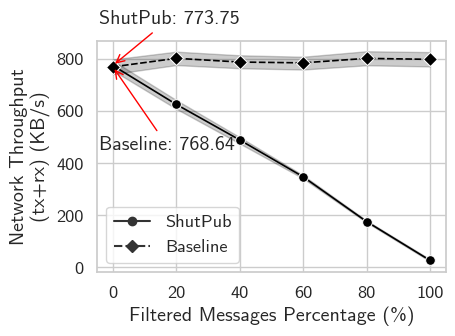

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.signal import find_peaks
import seaborn as sns


sns.set(font_scale=1.2, style='whitegrid', font='CMU Sans Serif', rc={'figure.figsize':(4.5,3)})

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['figure.dpi'] = 100
rcParams['axes.unicode_minus'] = False

file_set = {
    100:[
        'log/0902/publisher/bs/BCDEF_pub_baseline.csv',
        'log/0902/publisher/psf/BCDEF_pub_psf.csv',
    ],
    80:[
        'log/0902/publisher/bs/ABCDE_pub_baseline.csv',
        'log/0902/publisher/psf/ABCDE_pub_psf.csv',
    ],
    60 :[
        'log/0902/publisher/bs/AACDE_pub_baseline.csv',
        'log/0902/publisher/psf/AACDE_pub_psf.csv',
    ],
    40:[
        'log/0902/publisher/bs/AAADE_pub_baseline.csv',
        'log/0902/publisher/psf/AAADE_pub_psf.csv',
    ],
    20:[
        'log/0902/publisher/psf/AAAAE_pub_psf.csv',
        'log/0902/publisher/bs/AAAAE_pub_baseline.csv',
    ],
    0:[
        'log/0902/publisher/psf/AAAAA_pub_psf.csv',
        'log/0902/publisher/bs/AAAAA_pub_baseline.csv',
    ],
}

dfs = []

for mi, file_paths in file_set.items():
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        mi_broker = df.copy()
        mi_broker['timestamp'] = mi_broker['Unix Time'] - mi_broker['Unix Time'][0]
        mi_broker['messageInterval'] = mi

        if "baseline" in file_path:
            mi_broker['type'] = "baseline"
        else:
            mi_broker['type'] = "psf"

        dfs.append(mi_broker)

merged_df = pd.concat(dfs)
merged_df['total_KBs'] = merged_df['txKBs'] + merged_df['rxKBs']

g = sns.lineplot(data=merged_df, x='messageInterval', y='total_KBs', style_order=['psf', 'baseline'], hue_order=['psf', 'baseline'], markers=["o", "D"], style='type', errorbar=("ci",95),color='black', markersize=7, linewidth=1.2)
# g = sns.lineplot(data=merged_df, x='messageInterval', y='rxKBs', style_order=['psf', 'baseline'], hue_order=['psf', 'baseline'], markers=["o", "D"], style='type', errorbar=("ci",95),color='blue', markersize=7, linewidth=1.2)
# g = sns.lineplot(data=merged_df, x='messageInterval', y='txKBs', style_order=['psf', 'baseline'], hue_order=['psf', 'baseline'], markers=["o", "D"], style='type', errorbar=("ci",95),color='red', markersize=7, linewidth=1.2)


# g.set_title("Network Strain with Filtered Message Percentage", fontsize=26)

g.set_xlabel('Filtered Messages Percentage (%)')
g.set_ylabel('Network Throughput\n(tx+rx) (KB/s)')

legend= plt.legend()
legend_labels = legend.texts

for label in legend_labels:
    if label.get_text() == 'psf':
        label.set_text('ShutPub')
    if label.get_text() == 'baseline':
        label.set_text('Baseline')
#
baseline_value = merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==0]['total_KBs'].mean()
psf_value = merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==0]['total_KBs'].mean()


# Annotate the points on the plot
g.annotate(f'Baseline: {baseline_value:.2f}', xy=(0, baseline_value), xytext=(-10, -60), textcoords='offset points', arrowprops=dict(color='red', arrowstyle='->'))
g.annotate(f'ShutPub: {psf_value:.2f}', xy=(0, psf_value), xytext=(-10, 30), textcoords='offset points', arrowprops=dict(color='red', arrowstyle='->'))


# Save plot after it's displayed
# plt.savefig("actual_network_throughput_x_0.pdf", bbox_inches='tight')
baseline_value

In [123]:
merged_df.dtypes

Time                    object
Unix Time                int64
CPU Utilization (%)    float64
RAM Utilization (%)    float64
rxKBs                  float64
txKBs                  float64
timestamp                int64
messageInterval          int64
type                    object
total_KBs              float64
dtype: object

In [8]:
merged_df['total_KBs'] = merged_df['txKBs'] + merged_df['rxKBs']
merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==0]['total_KBs'].describe()

count     296.000000
mean      768.641892
std       237.284758
min         0.000000
25%       586.417500
50%       772.545000
75%       986.667500
max      1128.780000
Name: total_KBs, dtype: float64